# NBA Project — Final Project

> **Overview and Orientation** (updated September 26, 2025)  

 This first page gives a quick, friendly primer to the **NBA** and how the league’s structure and economics relate to on‑court play. It also sets context for the analyses that follow in this notebook.

---

## The NBA at a glance
- **What it is:** The **National Basketball Association** is the top men’s professional basketball league in North America.
- **Teams & conferences:** **30 teams** split into **Eastern** and **Western** Conferences, each with three divisions.
- **Season flow (high level):**
  1) **Preseason** (exhibition),  
  2) **Regular season** (typically 82 games per team),  
  3) **In‑Season Tournament** (since 2023, group stage → knockout),  
  4) **Play‑In Tournament** (seeds 7–10 fight for 7th/8th spots),  
  5) **Playoffs** (best‑of‑7 series) → **NBA Finals**.
- **Player pipeline:** High‑school → college / G‑League / international → **NBA Draft** (2 rounds), **undrafted free agents**, two‑way contracts via **NBA G‑League**.

---

## How player pay works (very short version)
- **Salary cap system:** The NBA uses a **soft cap** (teams can exceed it via exceptions) plus a **luxury tax** for high spenders.
- **Max contracts:** Tied to a percentage of the cap and **years of service**:  
  ~**25%** (0–6 YOS), **30%** (7–9 YOS), **35%** (10+ YOS).  
  Designated “supermax” rules allow qualified stars to earn at the top tier with larger raises.
- **Rookie scale & minimums:** First‑round picks sign **rookie‑scale** deals; veteran minimums scale with experience.
- **Two‑way deals:** Let teams keep developing players who split time between the NBA and G‑League (with limited NBA service days).
- **What do players actually make?** Ranges are wide:  
  • **Top superstars:** tens of millions of USD per season.  
  • **Solid starters / rotation players:** multi‑million annual salaries.  
  • **Two‑way / minimums:** lower end of the NBA spectrum.  
  *(Exact numbers vary year‑to‑year with the cap; we keep analysis cap‑agnostic here.)*

---

## Why money and structure matter for play style
- **Roster construction** (cap, exceptions, and market timing) shapes **who** shares the floor together.  
- **Player development** (G‑League, two‑ways) influences **spacing, pace, shot selection** as skill profiles evolve.  
- **Scheduling & incentives** (play‑in, in‑season tournament) can affect **rotation patterns, rest, and variance**.
- **Rule emphasis & analytics** have driven trends like:  
  - Rising **3PT attempt rate** and **pace** over the decades.  
  - More **switching defenses**, 5‑out spacing, and **rim/three** shot profiles.  
  - Bigs stretching the floor; playmaking spread across positions.

---

## This notebook: focus and data
- **Goal:** Study **how NBA playing style evolved over time**, with emphasis on shooting profiles, efficiency, pace, and role distributions.
- **Data source:** Public historical stats (NBA/ABA/BAA) compiled for research/education (Kaggle dataset referenced in the project brief).  
- **Methods & tools:** Pandas, NumPy, visualizations, and classic DS/ML toolbox (e.g., trend lines, PCA, clustering) as appropriate.
- **Deliverables in this notebook:** clear figures, short explanations, and **concise takeaways** after each section.

---

## Quick navigation
- Jump to: [Data Loading](#) · [Data Cleaning](#) · [Feature Engineering](#) · [Trends & Visuals](#) · [Models](#) · [Takeaways](#)

>




# Dataset Description

In this project, we employ the **NBA–ABA–BAA player statistics dataset** (publicly available on Kaggle).  
Our analysis focuses on the **Advanced Statistics** file (`player_stats_advanced.csv`), which provides per-season player-level advanced metrics spanning the history of the NBA and its predecessor leagues (ABA, BAA).

---

## Structure of the dataset

- **Observations:** Each row corresponds to the performance of a player in a given season.  
- **Time span:** Data covers the earliest BAA seasons (1946–47) through modern NBA seasons.  
- **Leagues:** BAA (1946–49), ABA (1967–76), NBA (1949–present).  
- **Teams:** Historical franchises included (with name changes reflected).

---

## Main variables

The dataset focuses on **advanced statistics**, commonly used in modern basketball analytics:

- $TS\\%$ – *True Shooting Percentage*: overall scoring efficiency (accounts for 2P, 3P, FT).  
- $3PAr$ – *Three-Point Attempt Rate*: fraction of field goal attempts from 3-point range.  
- $FTr$ – *Free Throw Rate*: ratio of free throw attempts to field goal attempts.  
- $USG\\%$ – *Usage Rate*: percentage of team plays a player uses while on court.  
- $PER$ – *Player Efficiency Rating*: per-minute productivity metric.  
- $WS$, $WS/48$ – *Win Shares* and *Win Shares per 48 minutes*: team success attributed to a player.  
- $BPM$, $OBPM$, $DBPM$ – *Box Plus/Minus* (overall, offensive, defensive impact).  
- $VORP$ – *Value Over Replacement Player*: overall contribution relative to a replacement-level player.  
- $AST\\%$, $TRB\\%$, $ORB\\%$, $DRB\\%$, $STL\\%$, $BLK\\%$, $TOV\\%$ – advanced rate stats capturing specific roles and contributions.  

Each record also contains identifiers:  
- **Player name, position, team, league, season**.  
- **Minutes played (MP)** – critical for interpreting rate statistics.

---

## Why this dataset?

1. **Historical breadth** – It spans multiple eras, allowing longitudinal analysis of how play style evolved.  
2. **Advanced focus** – The metrics are designed to capture efficiency, role, and style, rather than just raw totals.  
3. **Professional relevance** – NBA teams and analysts use nearly identical metrics (TS%, USG%, BPM, etc.) for player evaluation and roster construction.  
4. **Compatibility** – Well-structured CSV suitable for direct use in Python (Pandas, NumPy) and advanced methods (clustering, regression, PCA).

---

## Analytical opportunities

- Study **long-term trends** in shot selection (3PAr, FTr), efficiency (TS%), and playmaking (AST%).  
- Compare **roles and positions** across decades (big men vs guards).  
- Relate **usage vs efficiency trade-offs** in different eras.  
- Identify **clusters of player styles** and how these groups evolve over time.  
- Examine shifts around **league events** (ABA–NBA merger, salary cap changes).

---

> In summary, the dataset offers a comprehensive view of how basketball playing style has changed over nearly eight decades, enabling both descriptive exploration and predictive modeling.


# Research Questions

### 1) Era Comparison — “Who Would Dominate?”
We ask:
$$
\text{How do player statistics from different eras compare once adjusted for pace and league averages?}
$$

**Formal setup.**  
- Let $x_{i,t}$ be a statistic (e.g., TS%) for player $i$ in season $t$.  
- Define pace-adjusted stat per 100 possessions:  
$$
x^{*}_{i,t} = \frac{x_{i,t}}{P_t} \times 100,
$$
where $P_t$ is the average possessions per game in season $t$.  
- Standardize within season:  
$$
z_{i,t} = \frac{x^{*}_{i,t} - \mu_t}{\sigma_t},
$$
where $\mu_t, \sigma_t$ are the mean and std for season $t$.  

**Statistical comparison.**  
- Null hypothesis: distributions across decades are the same.  
- Use: KS test ($D$), Welch $t$-test, Mann–Whitney $U$.  
- Effect size: Cohen’s $d = \frac{\bar{x}_A - \bar{x}_B}{s_p}$.  

---

### 2) Positionless Basketball — “Do Bigs Look Like Guards?”
We ask:
$$
\text{To what extent do modern PF/Cs resemble guards in shot selection and playmaking?}
$$

**Feature vector:**  
$$
\mathbf{x}_{i,t} = [3PA, FTA, 3P\%, AST\%, TOV\%, USG\%, DRB\%, BLK\%].
$$

**Mathematical tools.**  
- PCA: find eigenvectors of covariance matrix $X^TX$ to reduce to 2D.  
- Clustering:  
$$
\min_{\mathcal{C}_1,\dots,\mathcal{C}_K} \sum_{k=1}^K \sum_{x \in \mathcal{C}_k} \|x - \mu_k\|^2.
$$
- Measure overlap between guard/big distributions over decades via cluster purity or silhouette score.  

---

### 3) Career Longevity Prediction — “Who Lasts 10+ Years?”
We ask:
$$
\text{Which early-career features predict whether a player lasts } \ge 10 \text{ years?}
$$

**Target variable:**  
$$
Y_i = \begin{cases}
1 & \text{if career length} \ge 10 \\
0 & \text{otherwise}
\end{cases}
$$

**Model. Logistic regression:**  
$$
\Pr(Y_i=1|\mathbf{x}_i) = \sigma(\beta_0 + \mathbf{x}_i^T \beta),
\quad \sigma(z) = \frac{1}{1+e^{-z}}.
$$

**Validation:** Stratified CV, metrics: AUC, F1.  
**Feature importance:** permutation importance, partial dependence.  

---

### 4) Cross-Era Archetypes — “What Roles Exist and How They Shift”
**Pipeline.**  
- Standardize features $\{PTS, AST, TRB, STL, BLK, 3PA, 3P\%, USG\%\}$.  
- Apply PCA → K-Means.  
- Archetypes: Rim Protector, 3\&D Wing, Initiator, Stretch Big.  

**Archetype prevalence.**  
$$
\pi_{k,d} = \frac{|\{i: \text{player } i \text{ in cluster } k \text{ during decade } d\}|}{|\{i: \text{all players in decade } d\}|}.
$$

**Centroid drift across time:**  
$$
\Delta_{k}(d_1,d_2) = \|\mu_{k,d_1} - \mu_{k,d_2}\|_2.
$$

Tracks how definitions of roles change across decades.



# NBA Play Style Evolution — Clean Executed Report

**Dataset:** `Advanced.csv` (player-season advanced stats)  
**Goal:** Show clear, rendered outputs that travel with the notebook.


In [ ]:

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
plt.rcParams["figure.figsize"] = (8, 4.8)


## 1) Load Data

In [ ]:

DATA_PATH = "Advanced.csv"
df = pd.read_csv(DATA_PATH)
print("Rows:", len(df), "| Cols:", df.shape[1])
df.head(10)


Rows: 32606 | Cols: 30


,season,lg,player,player_id,age,team,pos,g,gs,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp
0,2025,NBA,Precious Achiuwa,achiupr01,25.0,NYK,C,57,10.0,1170.0,13.6,0.530,0.110,0.211,10.0,21.0,15.5,6.2,2.0,3.3,11.2,14.9,0.7,1.7,2.3,0.095,-2.1,0.2,-1.9,0.0
1,2025,NBA,Steven Adams,adamsst01,31.0,HOU,C,58,3.0,794.0,16.6,0.541,0.012,0.557,21.8,22.0,21.9,10.9,1.3,3.2,20.6,13.6,1.0,1.3,2.3,0.137,0.0,0.3,0.3,0.5
2,2025,NBA,Bam Adebayo,adebaba01,27.0,MIA,C,78,78.0,2674.0,18.9,0.561,0.199,0.295,7.7,23.1,15.5,20.0,1.8,1.9,11.4,23.5,3.5,4.0,7.5,0.135,1.0,1.0,2.0,2.7
3,2025,NBA,Ochai Agbaji,agbajoc01,24.0,TOR,SG,64,45.0,1739.0,12.0,0.601,0.474,0.090,3.7,11.4,7.5,7.9,1.6,1.6,8.9,14.6,1.6,1.5,3.1,0.087,-0.9,0.2,-0.7,0.5
4,2025,NBA,Santi Aldama,aldamsa01,24.0,MEM,PF,65,16.0,1660.0,16.8,0.588,0.503,0.145,6.1,20.3,13.3,15.2,1.5,1.6,9.3,18.5,2.9,2.0,5.0,0.144,2.5,0.7,3.2,2.2
5,2025,NBA,Nickeil Alexander-Walker,alexani01,26.0,MIN,SG,82,10.0,2073.0,11.6,0.579,0.601,0.192,2.9,11.1,7.1,15.0,1.2,1.5,12.9,16.0,2.0,2.3,4.3,0.099,-0.8,0.4,-0.4,0.8
6,2025,NBA,Trey Alexander,alexatr01,21.0,DEN,SG,24,0.0,117.0,2.9,0.374,0.415,0.098,1.0,9.8,5.6,11.4,0.8,0.8,10.5,17.3,-0.2,0.0,-0.2,-0.077,-7.9,-1.8,-9.7,-0.2
7,2025,NBA,Grayson Allen,allengr01,29.0,PHO,SG,64,7.0,1544.0,13.7,0.631,0.716,0.233,2.5,11.3,7.0,12.5,1.7,1.2,12.2,17.6,2.0,0.6,2.5,0.079,0.7,-1.0,-0.3,0.7
8,2025,NBA,Jarrett Allen,allenja01,26.0,CLE,C,82,82.0,2296.0,22.1,0.724,0.008,0.433,10.5,26.7,18.8,9.5,1.6,2.9,11.3,15.9,7.6,4.0,11.6,0.243,3.0,1.2,4.2,3.6
9,2025,NBA,Jose Alvarado,alvarjo01,26.0,NOP,PG,56,23.0,1366.0,13.4,0.523,0.593,0.142,2.1,8.9,5.4,27.3,2.6,1.0,13.4,19.8,0.7,0.5,1.2,0.043,-0.6,-0.8,-1.4,0.2


## 2) Clean the data

In [ ]:

def season_to_year(s):
    try:
        if isinstance(s, (int, np.integer)):
            return int(s)
        s = str(s)
        if "-" in s:
            left, right = s.split("-")
            right = right.strip()
            if len(right) == 2:
                century = left[:2]
                return int(century + right)
            return int(right)
        return int(s)
    except Exception:
        return np.nan

df["season_year"] = df["season"].apply(season_to_year)

num_cols = ["age","g","gs","mp","per","ts_percent","x3p_ar","f_tr","orb_percent","drb_percent","trb_percent",
            "ast_percent","stl_percent","blk_percent","tov_percent","usg_percent","ows","dws","ws","ws_48",
            "obpm","dbpm","bpm","vorp"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

if "lg" in df.columns:
    df = df[df["lg"].isin(["NBA","ABA","BAA"]) | df["lg"].isna()].copy()

subset_cols = [c for c in ["player_id","player","season","team","mp"] if c in df.columns]
if subset_cols:
    df = df.drop_duplicates(subset=subset_cols)

# Simplify positions
if "pos" in df.columns:
    def pos_simple(p):
        if pd.isna(p): return np.nan
        p=str(p)
        if "C" in p: return "C"
        if "F" in p: return "F"
        if "G" in p: return "G"
        return p
    df["pos_simple"] = df["pos"].apply(pos_simple)
else:
    df["pos_simple"] = np.nan

# Era buckets
def era(y):
    if pd.isna(y): return np.nan
    y=int(y)
    if y < 1980: return "Pre-3PT (<1980)"
    if y < 1990: return "1980s"
    if y < 2000: return "1990s"
    if y < 2010: return "2000s"
    if y < 2020: return "2010s"
    return "2020s"
df["era"] = df["season_year"].apply(era)

# Minutes buckets
df["mp_bucket"] = pd.cut(df["mp"], bins=[0, 200, 500, 1000, 1500, 2000, 2500, 4000],
                         labels=["<200","200-500","500-1k","1k-1.5k","1.5k-2k","2k-2.5k","2.5k-4k"])

# Core sample
df_core = df[df["mp"] >= 500].copy()
print("Core sample (mp>=500):", len(df_core))


Core sample (mp>=500): 21065


## 3)  Data Exploration

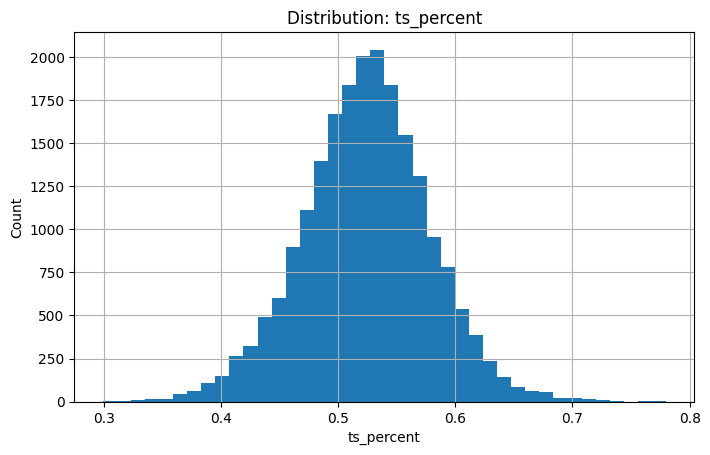

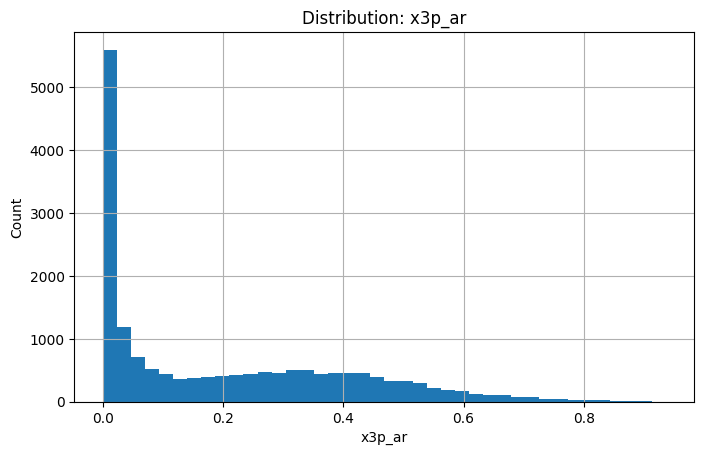

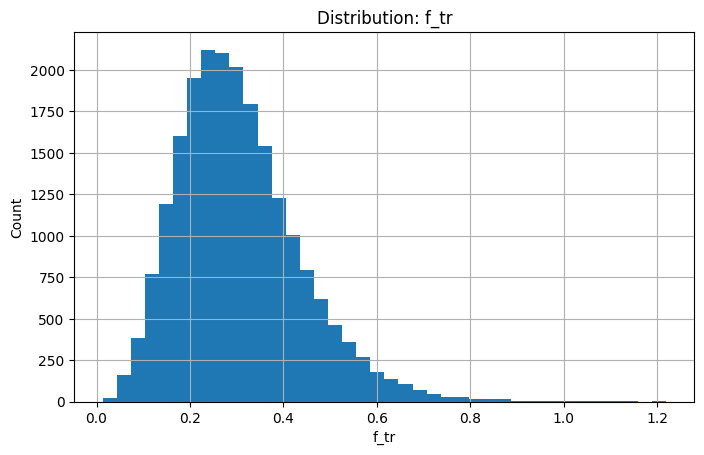

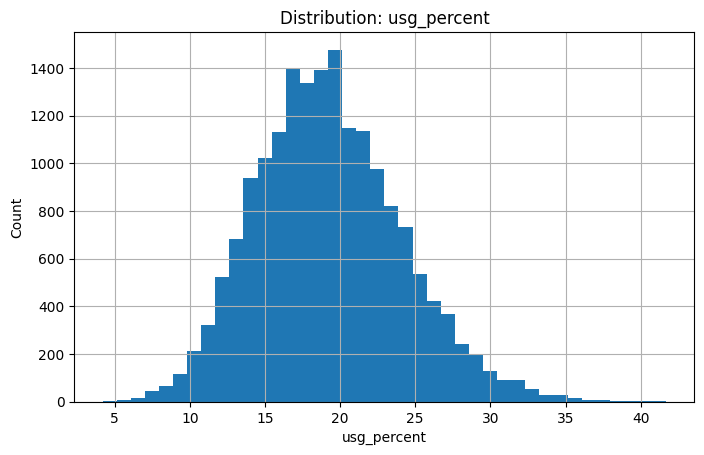

In [ ]:

for col in ["ts_percent","x3p_ar","f_tr","usg_percent"]:
    if col in df_core.columns:
        plt.figure()
        plt.hist(df_core[col].dropna(), bins=40)
        plt.title(f"Distribution: {col}")
        plt.xlabel(col); plt.ylabel("Count"); plt.grid(True)
        plt.show()


## 4) Trends Over Time

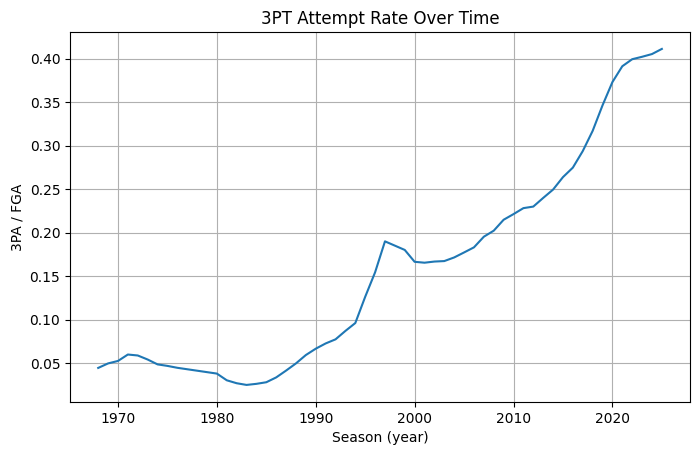

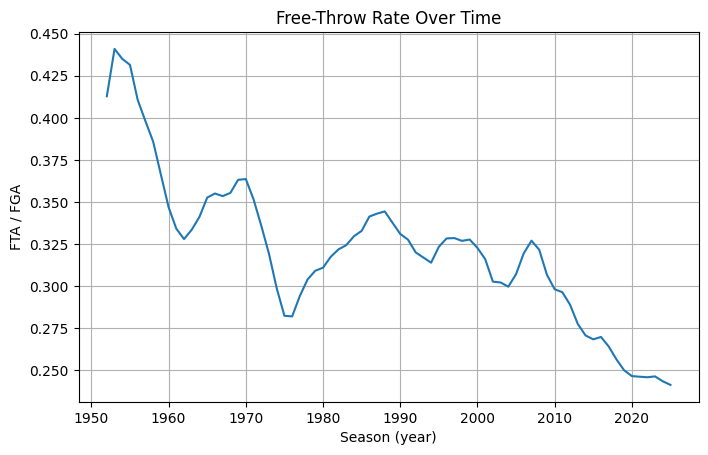

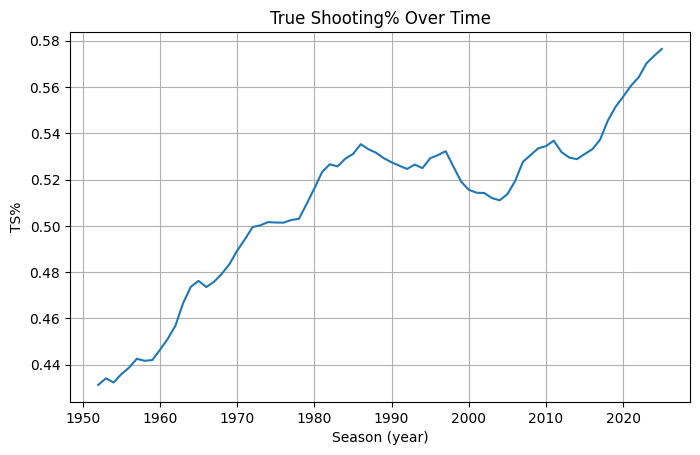

In [ ]:

def line_by_year(group, y_col, ylabel=None, title=None, smooth=3):
    agg = (group.groupby("season_year")[y_col].mean()
           .dropna().reset_index().sort_values("season_year"))
    y = agg[y_col].rolling(smooth, min_periods=1).mean() if smooth else agg[y_col]
    plt.figure()
    plt.plot(agg["season_year"], y)
    if title: plt.title(title)
    plt.xlabel("Season (year)"); plt.ylabel(ylabel or y_col); plt.grid(True)
    plt.show()
    return agg

if "x3p_ar" in df_core.columns:
    _x3 = line_by_year(df_core, "x3p_ar", "3PA / FGA", "3PT Attempt Rate Over Time")
if "f_tr" in df_core.columns:
    _ft = line_by_year(df_core, "f_tr", "FTA / FGA", "Free-Throw Rate Over Time")
if "ts_percent" in df_core.columns:
    _ts = line_by_year(df_core, "ts_percent", "TS%", "True Shooting% Over Time")


## 5) Positions and Roles

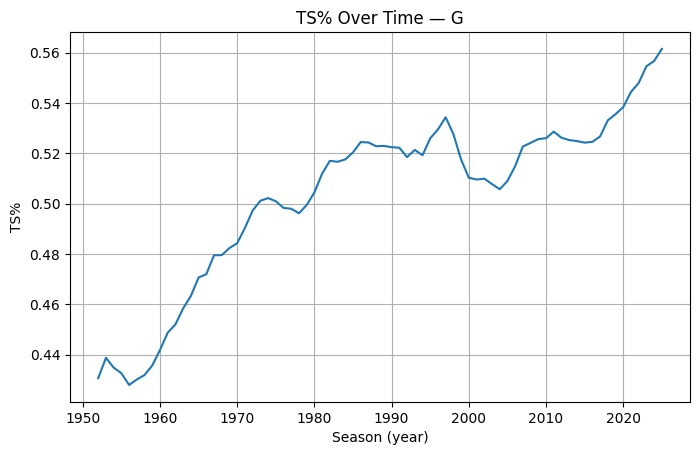

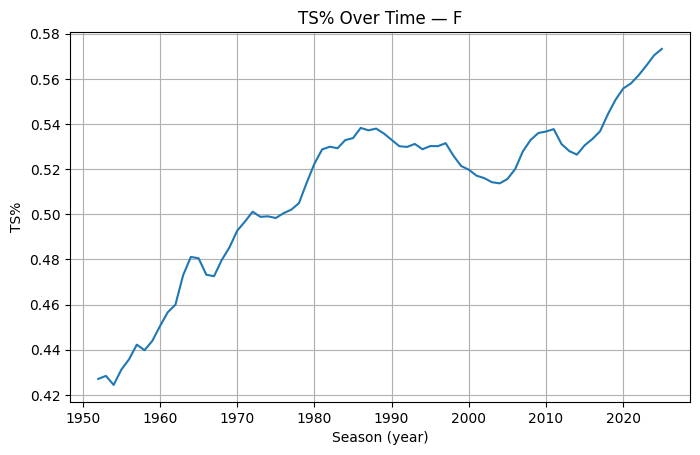

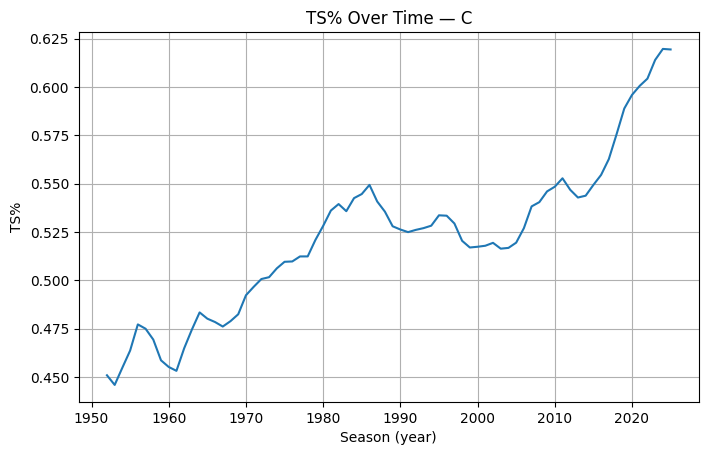

,era,pos_simple,usg_percent,ast_percent,trb_percent
0,1980s,C,17.431,7.999,14.573
1,1980s,F,19.611,10.303,11.699
2,1980s,G,19.990,21.865,5.476
3,1990s,C,17.536,7.015,14.808
4,1990s,F,19.436,10.198,11.626
5,1990s,G,19.799,22.524,5.903
6,2000s,C,16.968,6.604,14.978
7,2000s,F,19.387,10.494,11.357
8,2000s,G,19.816,21.249,6.258
9,2010s,C,18.300,8.839,16.120


In [ ]:

# TS% by position
if all(c in df_core.columns for c in ["ts_percent","pos_simple","season_year"]):
    for p in ["G","F","C"]:
        sub = df_core[df_core["pos_simple"]==p]
        if len(sub)>0:
            _ = line_by_year(sub, "ts_percent", "TS%", f"TS% Over Time — {p}")

# Roles by era × position
metrics = [c for c in ["usg_percent","ast_percent","trb_percent"] if c in df_core.columns]
if metrics:
    pivot = (df_core.groupby(["era","pos_simple"])[metrics].mean().round(3)
             .reset_index().sort_values(["era","pos_simple"]))
    display(pivot)


## 6) Impact Metrics by Era

In [ ]:

impact_cols = [c for c in ["bpm","vorp"] if c in df_core.columns]
if impact_cols:
    recs = []
    for e, g in df_core.groupby("era"):
        g = g.sort_values("mp", ascending=False).head(200)
        row = {"era": e}
        for c in impact_cols:
            row[f"{c}_mean"] = g[c].mean()
            row[f"{c}_p90"] = g[c].quantile(0.9)
            row[f"{c}_max"] = g[c].max()
        recs.append(row)
    era_df = pd.DataFrame(recs).sort_values("era")
    display(era_df.round(3))


,era,bpm_mean,bpm_p90,bpm_max,vorp_mean,vorp_p90,vorp_max
0,1980s,2.551,6.64,13.0,3.480,6.62,12.5
1,1990s,2.984,7.21,12.0,3.906,7.20,11.4
2,2000s,3.147,7.01,13.2,4.079,7.11,11.8
3,2010s,2.965,7.30,11.9,3.598,6.70,10.3
4,2020s,2.004,5.62,13.7,2.578,4.91,10.6
5,Pre-3PT (<1980),2.890,6.51,10.6,4.104,6.89,10.3


## 7) Correlations

             ts_percent  x3p_ar  f_tr  usg_percent  ast_percent  trb_percent  \
ts_percent         1.00    0.15  0.20         0.07        -0.01         0.16   
x3p_ar             0.15    1.00 -0.50        -0.04         0.16        -0.46   
f_tr               0.20   -0.50  1.00         0.06        -0.09         0.38   
usg_percent        0.07   -0.04  0.06         1.00         0.35        -0.10   
ast_percent       -0.01    0.16 -0.09         0.35         1.00        -0.49   
trb_percent        0.16   -0.46  0.38        -0.10        -0.49         1.00   
tov_percent       -0.17   -0.31  0.30        -0.25         0.29         0.08   
bpm                0.55    0.05  0.18         0.40         0.38         0.11   
vorp               0.44   -0.01  0.19         0.44         0.38         0.10   
per                0.54   -0.18  0.31         0.64         0.29         0.28   
ws_48              0.68   -0.10  0.35         0.20         0.09         0.32   

             tov_percent   bpm  vorp   

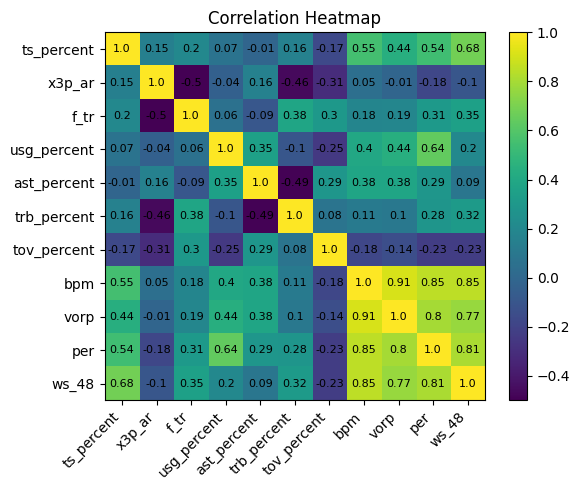

In [ ]:

corr_cols = [c for c in ["ts_percent","x3p_ar","f_tr","usg_percent","ast_percent","trb_percent","tov_percent","bpm","vorp","per","ws_48"] if c in df_core.columns]
corr = df_core[corr_cols].corr().round(2)
print(corr)

plt.figure(figsize=(6,5))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="right")
plt.yticks(range(len(corr_cols)), corr_cols)
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        plt.text(j, i, corr.iloc[i, j], ha='center', va='center', fontsize=8)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


## 8) Usage vs Efficiency

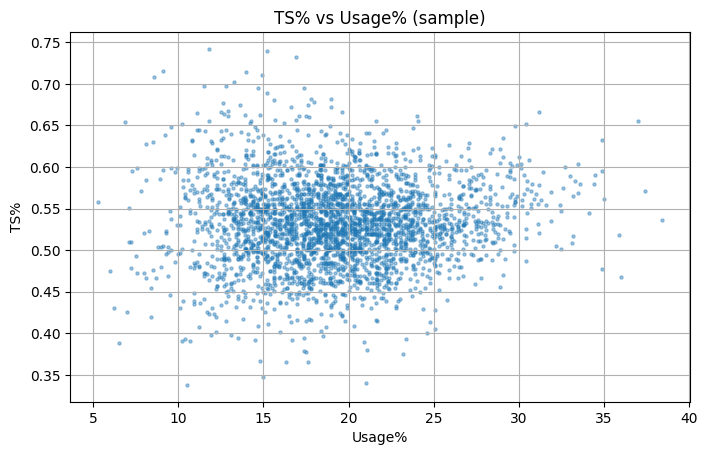

OLS: TS% = 0.518 + 0.001 * Usage%, R^2 = 0.005


In [ ]:

def simple_ols(x, y):
    X = np.column_stack([np.ones(len(x)), x])
    beta, *_ = np.linalg.lstsq(X, y, rcond=None)
    y_hat = X @ beta
    ss_res = ((y - y_hat)**2).sum()
    ss_tot = ((y - y.mean())**2).sum()
    r2 = 1 - ss_res/ss_tot if ss_tot>0 else np.nan
    return beta, r2

if all(c in df_core.columns for c in ["usg_percent","ts_percent"]):
    sub = df_core.dropna(subset=["usg_percent","ts_percent"])
    sample = sub.sample(min(3000, len(sub)), random_state=42) if len(sub)>3000 else sub
    plt.figure()
    plt.scatter(sample["usg_percent"], sample["ts_percent"], s=5, alpha=0.4)
    plt.xlabel("Usage%"); plt.ylabel("TS%"); plt.title("TS% vs Usage% (sample)"); plt.grid(True)
    plt.show()

    beta, r2 = simple_ols(sub["usg_percent"].values, sub["ts_percent"].values)
    print(f"OLS: TS% = {beta[0]:.3f} + {beta[1]:.3f} * Usage%, R^2 = {r2:.3f}")


## 9) Computed Summary Numbers

In [ ]:

def avg_range(series, start, end):
    s = series.loc[(series.index >= start) & (series.index <= end)]
    return float(s.mean()) if len(s)>0 else np.nan

out = {}

# 3PT attempt rate
if "x3p_ar" in df_core.columns:
    x3 = df_core.dropna(subset=["x3p_ar","season_year"]).groupby("season_year")["x3p_ar"].mean()
    out["x3p_1980s"] = avg_range(x3, 1980, 1989)
    out["x3p_2020s"] = avg_range(x3, 2020, 2099)
    out["x3p_last"] = float(x3.iloc[-1])
# FTr
if "f_tr" in df_core.columns:
    ft = df_core.dropna(subset=["f_tr","season_year"]).groupby("season_year")["f_tr"].mean()
    out["ftr_1980s"] = avg_range(ft, 1980, 1989)
    out["ftr_2020s"] = avg_range(ft, 2020, 2099)
    out["ftr_last"] = float(ft.iloc[-1])
# TS%
if "ts_percent" in df_core.columns:
    ts = df_core.dropna(subset=["ts_percent","season_year"]).groupby("season_year")["ts_percent"].mean()
    out["ts_1980s"] = avg_range(ts, 1980, 1989)
    out["ts_2020s"] = avg_range(ts, 2020, 2099)
    out["ts_last"] = float(ts.iloc[-1])

# Positions latest TS% (approx last season)
if all(c in df_core.columns for c in ["pos_simple","ts_percent","season_year"]):
    latest_year = int(df_core["season_year"].dropna().max())
    latest = df_core[df_core["season_year"]==latest_year]
    out["latest_TS_by_pos"] = latest.groupby("pos_simple")["ts_percent"].mean().round(3).to_dict()

pd.Series(out)


,0
x3p_1980s,0.038534
x3p_2020s,0.405122
x3p_last,0.41764
ftr_1980s,0.332378
ftr_2020s,0.243612
ftr_last,0.239284
ts_1980s,0.529431
ts_2020s,0.570323
ts_last,0.573775
latest_TS_by_pos,"{'C': 0.61, 'F': 0.574, 'G': 0.559}"


# Exploratory Data Analysis (EDA)

We explore the advanced player statistics dataset to understand its structure, missingness, distributions, and temporal trends.


In [ ]:
# Load dataset (assuming already loaded as df_adv)
df = df.copy()
df.head()

,season,lg,player,player_id,age,team,pos,g,gs,mp,per,ts_percent,x3p_ar,f_tr,orb_percent,drb_percent,trb_percent,ast_percent,stl_percent,blk_percent,tov_percent,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,season_year,pos_simple,era,mp_bucket
0,2025,NBA,Precious Achiuwa,achiupr01,25.0,NYK,C,57,10.0,1170.0,13.6,0.530,0.110,0.211,10.0,21.0,15.5,6.2,2.0,3.3,11.2,14.9,0.7,1.7,2.3,0.095,-2.1,0.2,-1.9,0.0,2025,C,2020s,1k-1.5k
1,2025,NBA,Steven Adams,adamsst01,31.0,HOU,C,58,3.0,794.0,16.6,0.541,0.012,0.557,21.8,22.0,21.9,10.9,1.3,3.2,20.6,13.6,1.0,1.3,2.3,0.137,0.0,0.3,0.3,0.5,2025,C,2020s,500-1k
2,2025,NBA,Bam Adebayo,adebaba01,27.0,MIA,C,78,78.0,2674.0,18.9,0.561,0.199,0.295,7.7,23.1,15.5,20.0,1.8,1.9,11.4,23.5,3.5,4.0,7.5,0.135,1.0,1.0,2.0,2.7,2025,C,2020s,2.5k-4k
3,2025,NBA,Ochai Agbaji,agbajoc01,24.0,TOR,SG,64,45.0,1739.0,12.0,0.601,0.474,0.090,3.7,11.4,7.5,7.9,1.6,1.6,8.9,14.6,1.6,1.5,3.1,0.087,-0.9,0.2,-0.7,0.5,2025,G,2020s,1.5k-2k
4,2025,NBA,Santi Aldama,aldamsa01,24.0,MEM,PF,65,16.0,1660.0,16.8,0.588,0.503,0.145,6.1,20.3,13.3,15.2,1.5,1.6,9.3,18.5,2.9,2.0,5.0,0.144,2.5,0.7,3.2,2.2,2025,F,2020s,1.5k-2k


In [ ]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32606 entries, 0 to 32605
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       32606 non-null  int64   
 1   lg           32606 non-null  object  
 2   player       32606 non-null  object  
 3   player_id    32606 non-null  object  
 4   age          32586 non-null  float64 
 5   team         32606 non-null  object  
 6   pos          31410 non-null  object  
 7   g            32606 non-null  int64   
 8   gs           24451 non-null  float64 
 9   mp           31523 non-null  float64 
 10  per          31506 non-null  float64 
 11  ts_percent   32466 non-null  float64 
 12  x3p_ar       26111 non-null  float64 
 13  f_tr         32445 non-null  float64 
 14  orb_percent  27308 non-null  float64 
 15  drb_percent  27308 non-null  float64 
 16  trb_percent  28897 non-null  float64 
 17  ast_percent  29881 non-null  float64 
 18  stl_percent  26999 non-nul

In [ ]:
# Missing values ratio per column
df.isna().mean().sort_values(ascending=False).head(20)

,0
gs,0.250107
x3p_ar,0.199196
tov_percent,0.176072
dbpm,0.173342
obpm,0.173342
bpm,0.173342
vorp,0.173189
usg_percent,0.173005
stl_percent,0.171962
blk_percent,0.171901


In [ ]:
# Summary statistics for main advanced metrics
key_cols = ['ts_pct','x3par','ftr','usg_pct','per','ws','ws_per_48','bpm','obpm','dbpm','vorp']
present = [c for c in key_cols if c in df.columns]
df[present].describe(percentiles=[.1,.25,.5,.75,.9])

,per,ws,bpm,obpm,dbpm,vorp
count,31506.000000,32595.000000,26954.000000,26954.000000,26954.000000,26959.000000
mean,12.499756,2.361068,-1.861119,-1.636759,-0.224215,0.540487
std,6.257583,2.957410,4.900821,3.931540,1.824747,1.254355
min,-90.600000,-2.800000,-92.100000,-68.900000,-31.100000,-2.600000
10%,6.400000,-0.100000,-6.100000,-5.300000,-1.800000,-0.300000
25%,9.800000,0.200000,-3.600000,-3.300000,-1.000000,-0.100000
50%,12.700000,1.300000,-1.500000,-1.400000,-0.200000,0.100000
75%,15.700000,3.600000,0.400000,0.300000,0.600000,0.800000
90%,18.800000,6.500000,2.300000,2.000000,1.500000,2.000000
max,133.800000,25.400000,242.200000,199.400000,60.700000,12.500000


In [ ]:
# Add decade column
def to_decade(y):
    try: return int(y) - int(y)%10
    except: return None
df['decade'] = df['season'].apply(to_decade)
df['decade'].value_counts().sort_index()

,count
decade,
1940,582
1950,1506
1960,1817
1970,4085
1980,3810
1990,4913
2000,5442
2010,6134
2020,4317


In [ ]:
# Weighted league averages per season (minutes weighted)
metrics = [c for c in ['ts_percent','x3p_ar','f_tr','usg_percent'] if c in df.columns]
df['w'] = df['mp'].fillna(0)

# Calculate weighted sum and total weight for each metric and season
weighted_sums = df.dropna(subset=['season', 'mp']).groupby('season').agg(
    **{f'{m}_weighted_sum': ('w', lambda x, col=m: (df.loc[x.index, col].fillna(0) * x).sum()) for m in metrics}
)
total_weights = df.dropna(subset=['season', 'mp']).groupby('season')['w'].sum()

# Calculate weighted average
trend = pd.DataFrame(index=weighted_sums.index)
for m in metrics:
    trend[m] = weighted_sums[f'{m}_weighted_sum'] / total_weights

trend.index = trend.index.astype(int)
trend = trend.sort_index()
trend.head()

,ts_percent,x3p_ar,f_tr,usg_percent
season,,,,
1952,0.436346,0.0,0.423217,0.0
1953,0.442120,0.0,0.474591,0.0
1954,0.436941,0.0,0.436828,0.0
1955,0.448391,0.0,0.415946,0.0
1956,0.451347,0.0,0.413600,0.0


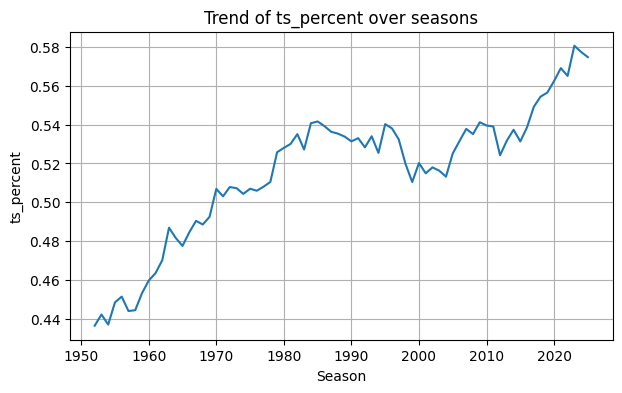

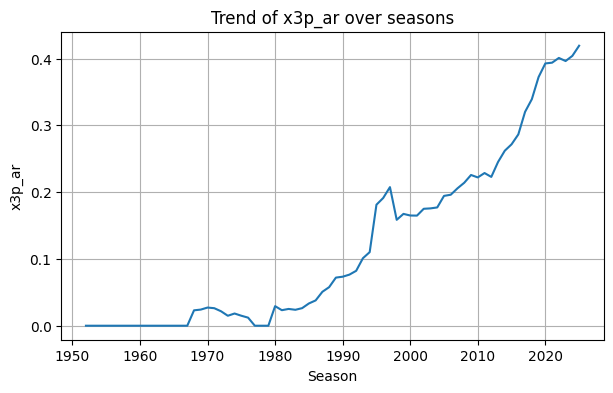

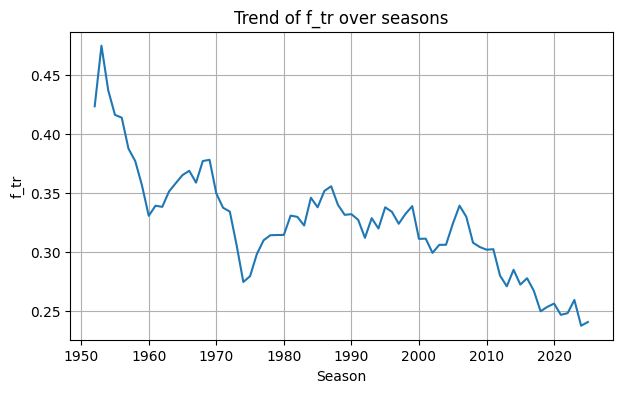

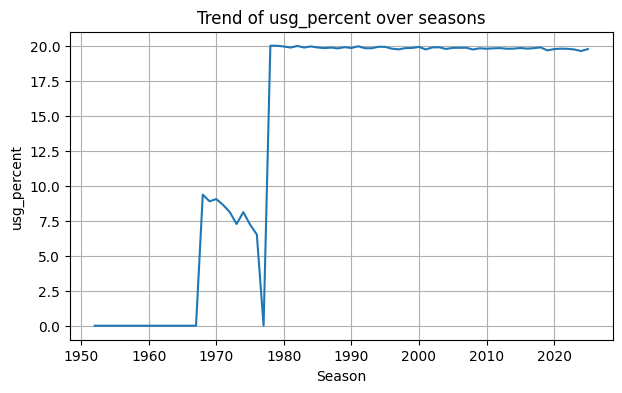

In [ ]:
# Plot trends
import matplotlib.pyplot as plt
for m in trend.columns:
    plt.figure(figsize=(7,4))
    plt.plot(trend.index, trend[m])
    plt.title(f'Trend of {m} over seasons')
    plt.xlabel('Season')
    plt.ylabel(m)
    plt.grid(True)
    plt.show()

In [ ]:
# Histograms of core metrics
for c in ['ts_pct','x3par','ftr','usg_pct']:
    if c in df.columns:
        plt.figure(figsize=(6,4))
        df[c].hist(bins=40)
        plt.title(f'Distribution of {c}')
        plt.xlabel(c)
        plt.ylabel('Count')
        plt.show()

### EDA Takeaways
- Early seasons lack 3P data (before 1979–80).  
- 3P attempt rate ($3PAr$) rises strongly over decades.  
- Free throw rate ($FTr$) shows different dynamics.  
- True Shooting % ($TS\%$) generally improves, reflecting efficiency gains.  
- Usage rate ($USG\%$) distributions highlight role differences across positions.  
